<img style="float: right;" src="https://img.shields.io/badge/%E6%A5%BC+-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98-red.svg?logo=&longCache=true&style=flat-square"></img>

# 深度学习基本概念介绍和线性分类器实现

---

### 实验介绍

本节实验我们将学习迁移学习（Transfer Learning）的内容。之前的实验中，我们基于 TensorFlow 搭建了一个网络结构非常简单的 CNN，来实现猫狗识别，但最后取得的效果并不是很好。实际上，深度学习实践中的网络结构通常可以达到几十甚至上百层的数目。所以在这次实验，我们将会使用已经被反复证明性能非常强悍的经典网络结构，并使用迁移学习来提高猫狗识别的准确率。

实验将向大家介绍迁移学习的概念，它为什么这么有效？我们应当如何解决在网络训练过程中，过拟合、欠拟合的问题。同时，还会涉及 PyTorch 的相关概念和使用 TensorBoard 训练可视化，模型的可视化等内容。

### 实验知识点

- 线性拟合
- 线性分类器
- softmax 和 Cross Entropy Loss
- 如何选取最优权重
- 随机选取权重
- 梯度下降法
- 学习率衰减策略
- 权重初始化
- softmax 和 Cross Entropy Loss 求导
- 实现线性分类器

### 实验目录

- [机器学习基本概念和线性拟合](#机器学习基本概念和线性拟合)
- [线性分类器](#线性分类器)
- [Softmax 和 Cross Entropy Loss](#Softmax-和-Cross-Entropy-Loss)
- [如何选取最优权重](#如何选取最优权重)
- [随机查找法（Random search）](#随机查找法（Random-search）)
- [梯度下降法（Gradient Descent）](#梯度下降法（Gradient-Descent）)
- [学习率衰减策略](#学习率衰减策略)
- [权重初始化方法](#权重初始化方法)
- [线性分类器实现](#线性分类器实现)

---

### 机器学习基本概念和线性拟合

机器学习基本概念有很多种定义，最著名也是使用最广泛的是 Mitchell 于 1997 年提出的: **对于某类任务 T 和性能度量 P，如果计算机程序在 T 上以 P 衡量的性能随着经验E而自我完善，那么就称这个计算机程序从经验 E 学习。**

接下来举一个简单的例子帮助理解这个概念。

线性拟合是初中的知识，原理非常、非常简单，就是用一条直线拟合一些点，并使得所有点到直线的距离之和最短。以下是一个示意图，使用蓝线拟合红点:

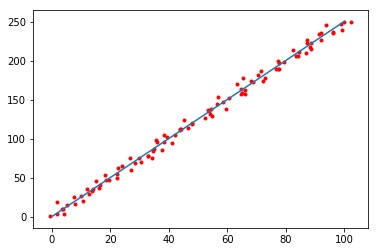

假设有 $N$ 个点，每个点的坐标为 $(x_i,y_i)$，直线的公式是 $y=ax+b$，所以线性拟合的目的是找到 $a$ 和 $b$ 使得所有点到直线的距离之和最短。

复习一下点到直线的距离公式:

$$ d = \left| \frac { a x - y + b } { \sqrt { a ^ { 2 } + 1 } } \right| $$

再对所有点到直线的距离求和可以表示为:

$$ L = \frac{1}{2N}\sum_{i=1}^N \frac{(a x_{ i } - y_{ i } + b)^2}{a^2+1} $$

那么最终的目的，则是求得 $a$ 和 $b$ 使得 $L$ 最小。

回顾机器学习的概念，可以将整个线性拟合的过程对应到这些概念之中:

* 经验 E: 线性拟合中给出的这些点（红点）。
* 某类任务 T: 使用蓝线拟合红点，求得最优的 $a$ 和 $b$。
* 衡量的性能 P: 所有点到直线的距离之和最短，即使得 $L$ 最小。

再次更抽象地对应到深度学习，称这些点为数据集，拟合过程为训练、构建模型，$L$ 为损失函数（Loss Function）或者误差函数（Error Function）、目标函数（Target Function）。

### 线性分类器

介绍完线性拟合之后，大致对深度学习的一些概念有了初步的了解。接下来根据线性拟合，可以引申出一个非常简单的分类器，**线性分类器。**

线性分类器的公式和线性拟合类似，只是线性分类器是一个多元函数，而线性拟合只是一元函数，是线性分类中最简单的一种。它的基本公式:

$$y=xW+b$$

当输入和输出有大于等于 2 个时，$W$ 和 $b$ 都为矩阵。在接下来的课程学习中，你会发现非常神奇的一件事，神经网络的基础之一就是这个最简单的公式。

为了内容更加简洁和方便叙述，接下来的线性分类器将会舍去偏置项 $b$，而使用更简单的形式:

$$y=xW$$

既然 $W$ 是矩阵，那么如何确定 $W$ 的维度呢？

首先假设数据集中有 $N$ 个数据，每个数据有具体的 $m$ 项，即 $X=\{x_1, x_2,\dots,x_m\}$，那么训练数据 $X$ 则为一个 $N$ 行 $m$ 列的矩阵。

假设输出的类别有 $C$ 个，期望输出的 $y$ 为每一个类别的概率，即 $Y=\{y_1, y_2,\dots,y_C\}$，那么输出 $Y$ 则为一个 $N$ 行 $C$ 列的矩阵，每一行对应一个样本的 $C$ 个类别的概率。

最后根据矩阵的乘法: $C_{p\times r} = A_{p\times q}\times B_{q\times r}$，可以得出权重 $W$ 为一个 $m\times C$的矩阵。

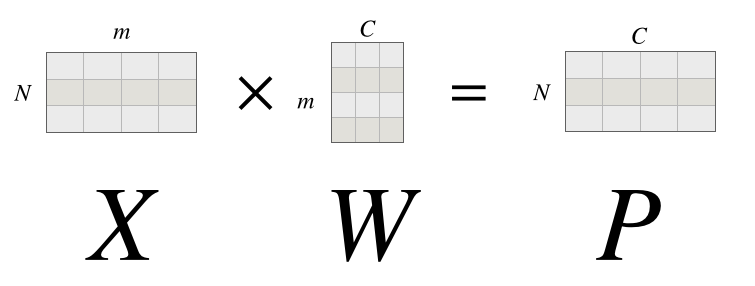

**接下来使用 mnist 数据集作为一个具体的实例进行讲解。**

[mnist](http://yann.lecun.com/exdb/mnist/) 又叫手写体数据集，里面包含了从 0 到 9 的 $28*28$ 的灰度图片，是深度学习中常用的一个数据集。其中训练集有 60000 个，测试集有 10000 个，0 到 9 的数字均匀分布。

对应到前面的叙述，则训练集 $C=10,\ N=60000$，测试集 $C=10,\ N=10000$。

下载手写体数据集:

In [ ]:
!wget mnist.zip

读取数据集:

In [67]:
import struct
import numpy as np
def read_mnist(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
mnist_test_data = read_mnist('mnist/t10k-images.idx3-ubyte')
mnist_train_data = read_mnist('mnist/train-images.idx3-ubyte')
mnist_train_labels = read_mnist('mnist/train-labels.idx1-ubyte')
mnist_test_labels = read_mnist('mnist/t10k-labels.idx1-ubyte')

来看一下 mnist 数据集长什么样子:

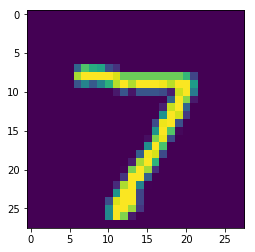

In [21]:
import matplotlib.pyplot as plt
plt.imshow(mnist_test_data[0, :, :])

读取完成之后，接下来数据预处理会进行以下操作:
* 对数据集的标签 $\{0, 1, \dots, 9\}$ 独热编码。
* 将数据展平并归一化。

one-hot（独热）编码指的是使用一个只有一位为 1 的二进制向量编码标签，下面独热编码一些数字，更为直观:

In [1]:
labels = [[1], [2], [3]] # 待编码的标签
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit_transform(labels).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

深度学习中使用独热编码来表示真实概率，因为只有独热编码的结果只有一位为 1。

展平操作如下图所示，讲一个 $28*28$ 的灰度图展平成一个一维向量，以输入线性分类器中。

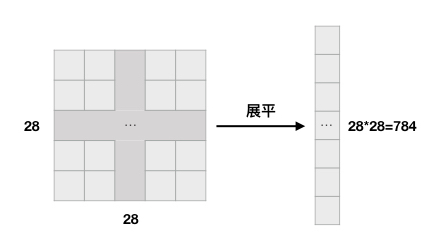

In [68]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(np.arange(10).reshape((-1, 1))) # 生成标签并独热编码
mnist_test_labels = encoder.transform(np.reshape(mnist_test_labels, (-1, 1))).toarray() # 生成标签并独热编码
mnist_train_labels = encoder.transform(np.reshape(mnist_train_labels, (-1, 1))).toarray() # 生成标签并独热编码

# 将数据展平并归一化，并归一化到 -0.5~0.5 之间
mnist_test_data = (np.reshape(mnist_test_data, (mnist_test_data.shape[0], -1))-127.0)/255.0
mnist_train_data = (np.reshape(mnist_train_data, (mnist_train_data.shape[0], -1))-127.0)/255.0

至此数据处理完毕。

由上面的定义可知，完成手写体的分类是本次的任务 T，所以需要定义一个**性能度量 P，即损失函数**，和一种 **算法 T** 使得损失最小。

**因此接下来会分别讲到这两部分内容，损失函数: Softmax 和 Cross Entropy Loss 和 算法 T: 如何求解最优的 $W$。**

### Softmax 和 Cross Entropy Loss

#### Softmax 函数

Softmax 函数函数是机器学习和深度学习中相当常用到的函数，它的公式如下:

$$
softmax(S)=\frac { e ^ { s _ { k } } } { \sum _ { j } e ^ { s _ { j } } }
$$

其中 $s_k$ 表示的是输入到 Softmax 函数的数据。

Softmax 函数具体的作用是将输入标准化到和为 1 的输出，经过 Softmax 函数的的数据可以被认为是概率。

为了更好理解，假设最后的输出 $y$ 为 $(3.2, 5.1, -1.7)$，对应的是每一个类别的概率，但是显然这个数字不能直接使用，通常来说概率都是和为 1 的，所以才需要经过 Softmax 进行标准化。

流程如图:

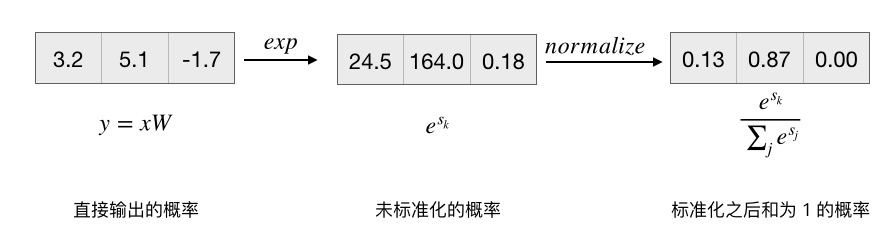

$y=xW$最后输出的是一个 $N\times C$ 的矩阵，每行对应一个样本的结果，所以需要按行进行标准化，使用 numpy 实现 Softmax 函数如下:

In [14]:
def softmax(input):
    assert len(input.shape)==2, '输入 softmax 函数的数据必须是一个二维矩阵'
    exp_value = np.exp(input) #首先计算指数
    output = exp_value/np.sum(exp_value, axis=1)[:, np.newaxis] # 然后按行标准化
    return output

test_data = np.array([[3.2, 5.1, -1.7]])
softmax(test_data)

array([[0.12998254, 0.86904954, 0.00096793]])

#### Cross Entropy Loss（交叉熵损失函数）

既然经过 Softmax 函数之后的是概率，**那么最根本的想法当然是使正确类别的概率最大。**Cross Entropy Loss 出现的目的就是使正确类别概率最大。

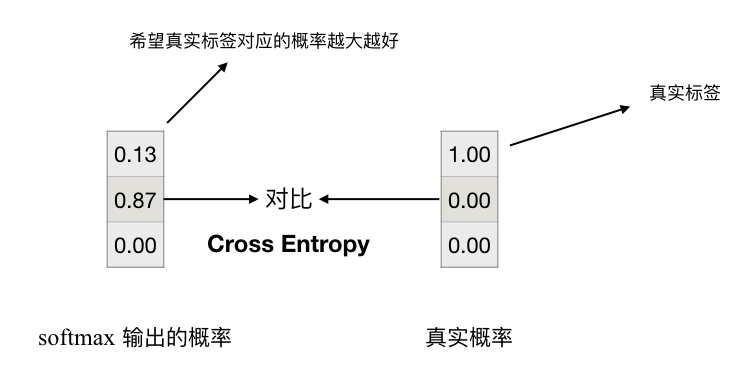

如上图所示，交叉熵是用来衡量两个概率之间的差别。深度学习中使用 softmax 输出的概率拟合真实概率，并使得这两个两个概率之间的交叉熵最小。

假设交叉熵损失函数为 $L$，那么单个样本的损失定义为:

$$
L _ { i } = - Y_i \log P_i
$$

指的是在样本是 $x_i$ 的情况下，使用概率分布 $P_i$ 拟合真实概率分布 $Y_i$ 的误差。

通常真实概率是由人类在数据集上打的标签，例如上图的 $[1.00,0.00,0.00]$ 是人为打的标签。通常将标签 one-hot（独热）编码为真实概率。

为了更容易理解，代入 Softmax 函数的公式作为概率，Cross Entropy Loss 可以写成:

$$
L _ { i } = - \sum y_i \log \left( \frac { e ^ { x_{ i } } } { \sum _ { j } e ^ { x _ { j } } } \right)
$$

多个样本时，只需要将各个样本的损失相加即可:

$$L = \sum L _ { i }$$

其中 $Y=(y_1,\dots,y_i,\dots)$ 是真实概率，因为是独热编码，所以 $y_i$ 要么为 0 要么 为 1；$X=(x_1,\dots,x_i,\dots)$ 是神经网络的输出。

接下来用代码来实现交叉熵损失函数，生成随机数据数据计算 Loss:

In [15]:
import numpy as np
# 最后的输出是 N*C
N, C = 100, 3
test_data = np.random.randn(N, C) # 生成随机数据
# 生成随机标签，不包括 C，并独热编码
encoder = OneHotEncoder()
test_labels = encoder.fit_transform(np.random.randint(0, C,(N, 1))).toarray()
prob = softmax(test_data) # 每一行对应一个样本，按行计算概率
loss = np.sum(-np.log(prob)) # 根据公式计算 loss
loss

422.74960718691295

Cross Entropy Loss 是分类任务中常用的损失函数，而且取得的效果很好。

### 如何选取最优权重

介绍完交叉熵损失函数之后，最终的目的是优化 $W$ 使得 $L$ 最小（这里选取的 $L$ 为交叉熵损失函数），那么采用什么方法才能找到最优的 $W$ 取得很好的性能呢？

接下来介绍两种方法，一种非常 naive 的随机查找法，另一种是深度学习的基础算法之一: 梯度下降法。

### 随机查找法（Random search）

为什么说随机查找法非常 naive？因为随机查找是随机生成 $W$ 以找到最优的 $W$。接下来用代码讲话，看看随机查找法的效果怎么样:

In [27]:
best_acc = -float('inf') # 最高的准确度
# 迭代 1000 次
for epoch in range(100):
    W = np.random.randn(784, 10)*0.01 # 随机生成 w，前面讲过 w 为 784*10 的矩阵
    prob = softmax(np.dot(mnist_test_data, W)) # 只计算测试集 xW 和概率
    y_predict = np.argmax(prob, axis=1) # 计算输出的标签，概率最大的
    y_real = np.argmax(mnist_test_labels, axis=1)
    acc = np.mean(y_predict==y_real) # 计算测试集准确度
    if acc>best_acc: best_acc=acc # 保存最好的准确度
best_acc

0.1952

迭代 100 次之后，随机猜能达到 20% 左右的准确度，相对于 10% 的随机概率要提高了一倍。

但是不是随机查找真的能取得非常好的效果，答案是不可能的。实际的深度学习任务的网络结构、参数比这里多得多，随机查找几乎不可能取得好的效果，除非有人相信天上能掉馅饼。

### 梯度下降法（Gradient Descent）

梯度下降法是深度学习的基础算法之一，它的基本思想是 **参数沿着梯度的相反方向更新。**

首先需要知道什么是梯度（Gradient）。

梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大。

也就是给定一个点，对一个变量来说朝梯度的方向走可以使函数取得最大的变化。

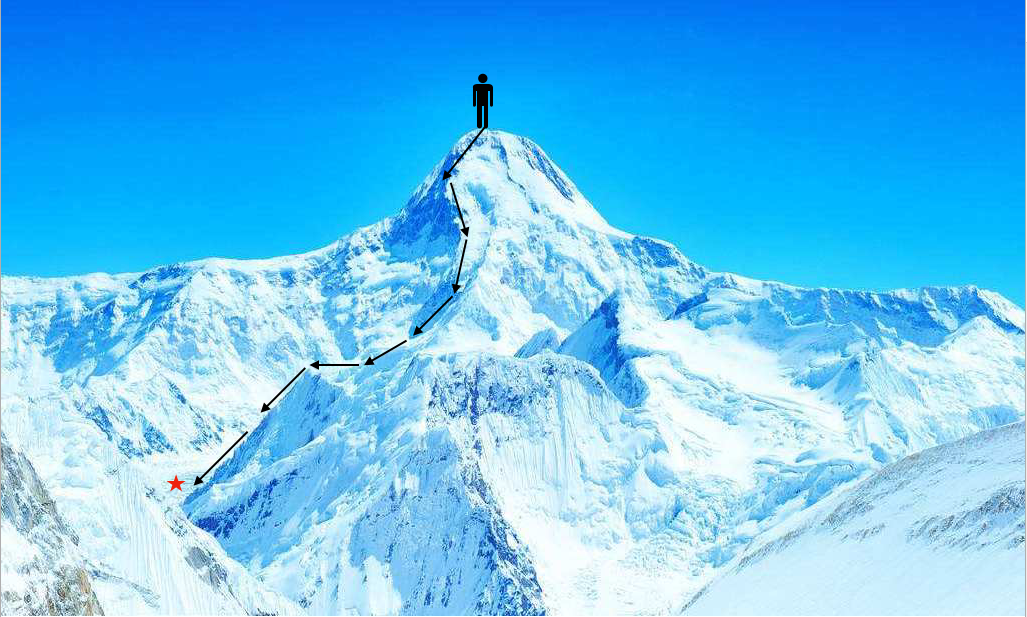

以这张图为例，现在你站在山顶，山的构造其实就是对应 loss 函数，因此你下山其实是在寻找 loss 函数的最小值点。现在你不知道自己在那里，也不知道东南西北。但是你只需要知道按照最陡的方向一直往下走就一定能到山脚了。

这里最抖的方向就是该函数的梯度。以二元函数为例，$z=f(x, y)$，对点 $(x_0, y_0)$ 有:

在点 $(x_0, y_0)$ 变化最剧烈的方向是 $\{\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\}$。代入变量可求得偏导，然后按照梯度的相反方向更新参数。

更常用来形容梯度下降的是下图:

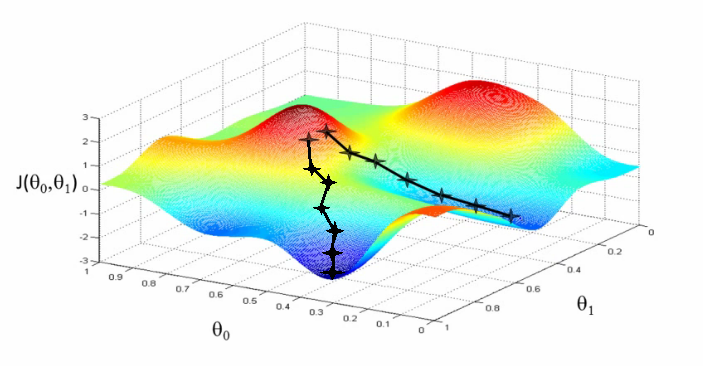

因此梯度下降法有两个重点:
1. **计算梯度**
2. **沿着梯度的反方向更新参数**

对于 1，计算梯度只需要简单的高数知识，在计算梯度时需要应用求导的链式法则，对于更深的网络，链式法则和反向传播算法非常重要，反向传播算法会在接下来的课程中会介绍。

如何计算偏导数可以参考 [维基百科 梯度](https://zh.wikipedia.org/wiki/梯度)，在此举一个简单的例子:

假设一个二元函数 $f(x,y)=xy$，对 $x$ 求偏导为 $\frac{\partial f}{\partial x}=y$，对 $y$ 求偏导为 $\frac{\partial f}{\partial y}=x$。总结则是，对一个变量求偏导，只需要将其他变量看作是常量，然后按照一元函数求导计算。

对于 2，需要理解的是最终损失函数可以换算成一个关于权重 $W$ 的函数，即 $L(x, W)$，梯度下降沿梯度的方向更新参数的基本公式为:

$$W = W-lr\frac{\partial L}{\partial W}$$

$lr$ 为一个提前设定的值，控制 $W$ 更新的幅度，对应到深度学习则是 **学习率**！

在实际使用时当然不会这么简单，不可能直接化简成关于 $W$ 的函数，这时候就需要 **链式法则** 了，链式法则公式如下:

$$
z = f(\sigma) \\
\sigma = g(x) \\
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial \sigma}\frac{\partial \sigma}{\partial x}
$$

$z$ 是关于 $\sigma$ 的函数，$\sigma$ 是关于 $x$ 的函数，则 $z$ 关于 $x$ 的导数等于 $z$ 关于 $\sigma$ 的导数乘以 $\sigma$ 关于 $x$ 的导数。

为了更好的理解梯度下降，让代码来说话。举一个最简单的例子，一个简单的一元四次函数，使用梯度下降法求解其极小值点。

生成一个拥有两个极小值点的四次函数:

In [ ]:
f = lambda x: (x+2)*(x+1)*(x-2)*(x-1)
X = np.linspace(-3, 3, 10000) 
Y = np.array([f(x) for x in X])

离散点的最小的 Y 和对应的 X:

In [ ]:
Y[np.argmin(Y)], X[np.argmin(Y)]

绘制出该四次函数曲线可以发现有两个极小值点，并且最小值是左边的极小值点（为了求导方便这个四次函数关于 Y 轴对称，两个极值点都为最小值）。

In [ ]:
plt.plot(X, Y)
plt.show()

$f(x)$ 为: $f(x)=(x+1)(x-1)(x+2)(x-2)$，对 $f(x)$ 求导可得: $f'(x)=4x^3-10x$。

直接人工计算结果，通过对 $f'(x)$ 等于零可得 $f(x)$ 的最小值对应的 $x$ 为 $x=\pm\sqrt{\frac{5}{2}}$。

In [ ]:
import math
df = lambda x: 4*x**3-10*x # 导数
math.sqrt(5/2)

根据上文介绍的梯度下降的基本准则，沿着梯度的方向更新参数，该一元函数更新 $x$ 的公式为:

$$x= x-\lambda f'(x)$$

下面就是利用梯度下降法求函数的极值点。

In [ ]:
lr = 0.001
x = -3
for i in range(1000):
    x -= lr*df(x)
x

$1000$ 其实就是控制 $x$ 更新的次数，对应的是深度学习中的最大迭代次数，可以看出该值基本上和 $\sqrt{\frac{5}{2}}$ 相差无几了。

### 学习率衰减策略

上面讲到了使用梯度下降法求解一个一元函数的极值，接下来为了更好的理解梯度下降法，绘制一个动画显示整个梯度下降的过程。

如何绘制动画并不要求掌握，但是关于如何使用 matplotlib 绘图，可以参考实验楼课程 [使用 Matplotlib 绘制 2D 和 3D 图形](https://www.shiyanlou.com/courses/1093)。

In [ ]:
%%capture
%matplotlib inline # 请不要删除这两行
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# 这是一个基本函数，用来演示梯度下降过程
def show_anim(X, Y, f, df, max_iterations, lr, initial_x):
    fig, ax = plt.subplots()
    # 绘制曲线
    ax.plot(X, Y)
    line, = ax.plot(0, 0, 'ro')
    # 绘制箭头
    annotation = ax.annotate("", xy=(0, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    # 返回梯度下降的点，生成动画的箭头
    # 梯度下降法的函数，传入代求解函数、导数、Y 值、最大迭代次数、学习率、初始起点
    def gradient_descent(f, df, Y, max_iterations=30, lr=0.001, x=-3):
        # 初始点
        points = [(x, f(x))]
        for _ in range(max_iterations):
            # 梯度下降，并保留中间的点
            x -= lr*df(x)
            points.append((x, f(x)))
        arrows = []
        for i in range(len(points)-1):
            # 箭头起始点和终点
            arrows.append((points[i], points[i+1]))
        return arrows
    
    arrows = gradient_descent(f, df, Y, max_iterations, lr, initial_x)

    def init():
        return line,
    
    # 更新画布
    def update(index):
        start, end = arrows[index]
        line.set_data(end[0], end[1])

        annotation.set_position(start)
        annotation.xy = end

        return line, annotation
    # 绘制动画，不需要掌握
    anim = animation.FuncAnimation(fig, update, interval=200, blit=False, frames=max_iterations, init_func=init)
    return anim

同样的参数动画演示上文的梯度下降法，学习率初始为 0.001，起始点 $x=-3$，最大迭代次数 100。

In [ ]:
%%capture
%matplotlib inline # 请不要删除这两行
lr = 0.001
initial_x = -3
max_iterations = 100
anim = show_anim(X, Y, f, df, max_iterations, lr, initial_x)

In [ ]:
HTML(anim.to_html5_video())

观察这个动画，会发现最初点下降的速度非常快，而到 **最低谷** 部分，下降的速度越来越慢，后期几乎不再变动。

因此为了提高梯度下降法后期的收敛速度和准确度，必须要应用 **学习率衰减策略**。

学习率衰减策略有三种，分别是:

* Step decay（按步长衰减）
* Exponential decay（指数衰减）：$\alpha = \alpha_0 e^{-k t}$，$t$ 是迭代次数，$\alpha_0$ 和 $k$ 是提前设定的值。
* 1/t decay (1/t 衰减）：$\alpha = \alpha_0 / (1 + k t )$，$t$ 是迭代次数，$\alpha_0$ 和 $k$ 是提前设定的值。

在实际应用中，按步长衰减是最常用的，因此这里将只使用和介绍 **按步长衰减**。

按步长衰减的基本公式如下:

$$lr = base\_lr*\alpha^k$$

$\alpha$ 为设定的衰减因子，$k$ 为是迭代次数/提前设定的步长，通俗点讲其实是每迭代一个设定的步长数目，则学习率变为上一个步长的 $\alpha$。

步长需要根据实际应用调整，但是衰减因子常为 0.1，即学习率是上一个步长的 $\frac{1}{10}$。

接下来用代码说话，实现按步长衰减策略（这段代码将贯穿本次课程）:

In [55]:
class lr_scheduler(object):
    def __init__(self, base_lr, step_size, deacy_factor=0.1):
        self.base_lr = base_lr # 最初的学习率
        self.deacy_factor = deacy_factor # 学习率衰减因子
        self.step_count = 0 # 当前的迭代次数
        self.lr = base_lr # 当前学习率
        self.step_size = step_size # 步长
        
    def step(self, step_count=1): # 默认 1 次
        self.step_count += step_count
    
    def get_lr(self):
        self.lr = self.base_lr*(self.deacy_factor**(self.step_count//self.step_size)) # 实现上面的公式
        return self.lr

In [ ]:
lr = 0.001
x = -3
max_iter = 10000
scheduler = lr_scheduler(lr, 1000)
for i in range(max_iter):
    x -= scheduler.get_lr()*df(x)
    scheduler.step()
x

应用学习率衰减策略时需要注意最大迭代次数足够，否则可能收敛不完全。

通过学习率衰减最后迭代的结果是 $1.5811388301861444$，而如果不应用结果是 $-1.581138831026283$，真实结果 $-1.5811388300841898$，只看后面几位，分别是 $01861444$，$1026283$，$00841898$。

事实证明应用学习率衰减获得了更好的结果!

由上文知道了学习率非常小时，会导致收敛速度很慢，**那么当学习率很大时，会有什么结果呢？**

答案是 **Loss 震荡或超出数值范围**

还是以上面的一元函数为例，当设置学习率非常大时，看看演示动画有什么效果。

In [ ]:
%%capture
%matplotlib inline
lr = 0.075
initial_x = -3
max_iterations = 100
anim = show_anim(X, Y, f, df, max_iterations, lr, initial_x)

In [ ]:
HTML(anim.to_html5_video())

可以看出，当学习率为 0.075时，最开始的阶段点变化的幅度非常大。虽然这里能够收敛，是因为如果再把学习率调大，更新 $x$ 时，会直接超出计算机可表示的范围。这就是深度学习中常讨论的 **数值的上溢和下溢**。你可以尝试自己把学习率调大之后，程序会报 `OverflowError`。

所以初始学习率不应过大也不应过小，通常在 0.0001~0.001 之间。

### 权重初始化方法

对深度学习有过一些了解的肯定知道，梯度下降法最大的问题是什么: **迭代终止于局部最优解，很难找到全局最优解。**

在本例中，当 $x$ 初始化为 3 呢？

In [ ]:
lr = 0.001
x = 3
for i in range(1000):
    x -= lr*df(x)
x

除了初始值外，同样的参数取得了不同的结果。

这就是一个好的权重初始化的重要性的体现了，一个好的权重可以获得可能更好的结果。这就是为什么 **迁移学习** 通常拿在 IMGAENET 训练好的模型，并可以获得高准确度的原因了，因为已经给定了一个非常好的初始化权重！（本课程不会涉及迁移学习）。

常用的初始化权重包括 gaussian（高斯）初始化和 Xavier 初始化。而偏置项一般是常数为 0 的初始化。

以经典的 Caffe 为例:

```
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  param {
    lr_mult: 1
  }
  param {
    lr_mult: 2
  }
  convolution_param {
    num_output: 20
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "xavier"
    }
    bias_filler {
      type: "constant"
    }
  }
}
```

这是 caffe 的配置文件设置一个卷积层的各项参数，后续课程会介绍卷积神经网络。`weight_filler` 采用的是 Xavier 初始化，而 `bias_filler` 采用 constant 初始化，默认为 0。

有一些深度学习不会自动调用某个初始化方法，而需要手动设置，例如 PyTorch 的初始化方法都在 [torch.nn.init](https://pytorch.org/docs/stable/nn.html#torch-nn-init) 中实现。

接下来就用代码说话，实现各种初始化方法。

In [ ]:
## 示例权重矩阵的形状
D, H = 10, 10

* 使用高斯初始化生成一个零均值、标准差为 0.01 的权重:

In [ ]:
W = 0.01*np.random.randn(D, H)
W

高斯初始化一般用于小网络，而且也能取得很好的效果，但是对于更深的网络，例如残差网络等几十层上百层的网络一般使用 Xavier 初始化。因为神经网络的基本算法是线性的 $y=Wx+b$，如果使用高斯初始化，不停的做线性运算，网络越深，输出的数据会呈现极端分布，要么是 1 要么是 -1。

* Xavier 初始化

In [ ]:
W = np.random.randn(D, H)/np.sqrt(D)
W

本次课程不会使用很深的网络，所以后续只会用到高斯初始化。

### 线性分类器实现

最后使用梯度下降法实现一个线性分类器，来看看在手写体数据集上能取得什么效果。

由上面的知识点，知道梯度下降法首先要计算损失函数关于权重的梯度，然后才能更新权重，即 $\frac{\partial L}{\partial W}$。

本次试验选择前面介绍的交叉熵损失函数，交叉熵损失函数如何计算 Loss 已经介绍了，接下来介绍如何对交叉熵损失函数计算梯度。

首先对于单个样本 $X=(x_1,\dots,x_i,\dots)$，真实概率 $Y=(y_1,\dots,y_i,\dots)$ 的交叉熵损失函数表达如下:

$$
L _ { i } = - \sum y_i \log \left( \frac { e ^ { x_{ i } } } { \sum _ { j } e ^ { x _ { j } } } \right)
$$

最初的公式是很复杂的，所以利用链式法则先计算 softmax 函数的梯度，再计算交叉熵损失函数的梯度，两者相乘即为交叉熵损失函数关于输入 $x$ 的梯度。

在此为了表述简洁，仅先讨论单个样本的情况。

#### softmax 函数求导

假设 softmax 函数的输出 $P=softmax(x)$ 为 $P=(p_1,\dots,p_i,\dots)$，如下图表述:

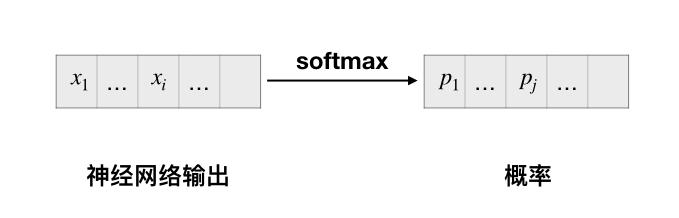

首先求 softmax 函数关于 $x$ 的梯度。

因为 $p_i=\frac { e ^ { x_{ i } } } { \sum _ { j } e ^ { x _ { j } }} $，所以 $p_i$ 关于 $x_j$ 的偏导为:

$$\frac{\partial p_i}{\partial x_j}=\frac{\partial}{\partial x_j} \frac { e ^ { x_{ i } } } { \sum _ { j } e ^ { x _ { j } } }$$

这个函数求导分 $i=j$ 和 $i\ne j$ 两种情况，当 $i=j$ 时，分母和分子都有变量；当 $i\ne j$，只有分母有变量，$x_j$ 是变量，$x_i$ 是常量。

**注意指数函数求导不变，即 $f(x)=f'(x)=e^x$。**

因此求导过程分这两种情况进行:

* $i=j$

$$\frac{\partial p_i}{\partial x_j}=\frac{(e^{x_{i}})^2\sum-(e^{x_{i}})^2}{(\sum)^2}\\
=\frac{e^{x_{i}}}{\sum}-(\frac{e^{x_{i}}}{\sum})^2$$

这时候会发现一件很神奇的事，化简可得:

$$\frac{\partial p_i}{\partial x_j}=p_i-p_i^2=p_i(1-p_i)=p_j(1-p_i)$$

* $i\ne j$

当 $i\ne j$ 时求导就简单多了。首先需要知道 $f(x)=\frac{1}{x}$ 的导函数为 $f'(x)=-\frac{1}{x^2}$。则:

$$\frac{\partial p_i}{\partial x_j}=-\frac{e^{x_i}e^{x_j}}{(\sum)^2}=-p_i p_j$$

因此对 softmax 求导完毕后发现导数值只与概率有关了，再对交叉熵损失函数关于输入 $x$ 求导，会发现一件更神奇的事。

#### 交叉熵损失函数求导

$$
\frac{\partial L}{\partial x_i} = - \sum_j y_j \frac{1}{p_j} \frac{\partial p_j}{\partial x_i}
$$

又因为真实概率 $Y=(y_1,\dots,y_i,\dots)$ 是独热编码，即只有一个元素为 1，其余为 0，因此可以化简该偏导为:

$$
\frac{\partial L}{\partial x_i} = -\frac{1}{p_j} \frac{\partial p_j}{\partial x_i}, y_j=1
$$

代入上面对 softmax 求导之后的结果。

当 $i=j$ 时，$y_i=y_j=1$，$\frac{\partial p_i}{\partial x_j}=p_j(1-p_i)$，代入可得:

$$\frac{\partial L}{\partial x_i} = -\frac{1}{p_j} \frac{\partial p_j}{\partial x_i}\\
=p_i-1\\
=p_i-y_i$$

当 $i\ne j$ 时，$y_j=1,y_i\ne 1$，即 $y_i=0$，且 $\frac{\partial p_i}{\partial x_j}=-p_i p_j$，代入可得:

$$\frac{\partial L}{\partial x_i} = -\frac{1}{p_j} \frac{\partial p_j}{\partial x_i}\\
=p_i\\
=p_i-0\\
=p_i-y_i$$

因此神奇的事情发生了，$L$ 关于 $x_i$ 的偏导总结为:

$$\frac{\partial L}{\partial x_i} =p_i-y_i$$

**交叉熵的梯度为拟合的概率与真实概率之间的差!**

上面的 $x$ 为经过线性分类器 $y=xW$ 之后的输出，下面求解 $L$ 关于权重 $W$ 的偏导，再次利用链式法则:

$$\frac{\partial L}{\partial W}=\frac{\partial y}{\partial W}\frac{\partial L}{\partial y}$$

其中对线性分类器求偏导，满足以下公式:

$$\frac{\partial y}{\partial W}=x^T$$

最后代入上文对交叉熵求导的结果，可得:

$$\frac{\partial L}{\partial W}=x^T(P-Y)$$

其中 $P$ 为经过 softmax 函数输出的概率，$Y$ 为样本标签的独热编码。

下面就根据求得的公式实现一个线性分类器!

#### 实现

为了代码可复用，可以在后续实验中使用。在此实现一个类，包含两个函数，`forward` 函数定义交叉熵损失函数的前向传播过程，计算损失；`backward` 函数定义交叉熵损失函数求解梯度的反向传播过程。

在下一次实验中将会介绍对于多层网络神经反向传播的概念，在此只实现一层的线性分类器。

In [52]:
class CrossEntropyLossLayer():
    def __init__(self):
        pass
    
    def forward(self, input, labels):
        # 做一些防止误用的措施，输入数据必须是二维的，且标签和数据必须维度一致
        assert len(input.shape)==2, '输入的数据必须是一个二维矩阵'
        assert len(labels.shape)==2, '输入的标签必须是独热编码'
        assert labels.shape==input.shape, '数据和标签数量必须一致'
        self.data = input
        self.labels = labels
        self.prob = np.clip(softmax(input), 1e-9, 1.0) #在取对数时不能为 0，所以用极小数代替 0
        loss = -np.sum(np.multiply(self.labels, np.log(self.prob)))
        return loss
    
    def backward(self):
        self.grad = self.prob - self.labels # 根据公式计算梯度

接下来生成一些数据测试:

In [54]:
N, C = 10, 3
pred_prob = np.random.randn(N, C) # 随机数据，代表线性分类器输出
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
labels = encoder.fit_transform(np.random.randint(0, C, (N, 1))).toarray() # 生成标签并独热编码
loss_layer = CrossEntropyLossLayer()
# 前向传播，传入数据和独热编码的标签
loss = loss_layer.forward(pred_prob, labels)
# 后向传播计算梯度
loss_layer.backward()
loss, loss_layer.grad

(14.069835721254274, array([[-0.93812046,  0.74074436,  0.1973761 ],
        [ 0.34621967, -0.47781676,  0.1315971 ],
        [-0.85112118,  0.81175522,  0.03936596],
        [ 0.0390735 , -0.77252034,  0.73344684],
        [ 0.55139215,  0.40140487, -0.95279702],
        [ 0.06541225,  0.45745902, -0.52287127],
        [-0.47276393,  0.36972234,  0.1030416 ],
        [ 0.2685396 , -0.58605481,  0.31751521],
        [ 0.35873063, -0.73103745,  0.37230681],
        [ 0.35236879, -0.46400877,  0.11163998]]))

上文已经介绍了线性分类器 $W$ 的形状为 $784\times 10$，在此不多做介绍:

首先需要设置完各项参数，然后就开始训练。

In [103]:
D_in, D_out = 784, 10
# 设置基础学习率
base_lr = 0.0001
# 设置最大迭代次数
max_iter = 100
# 设置学习率衰减步长
step_size = 40
# 初始化一个学习率调度器
scheduler = lr_scheduler(base_lr, step_size)
W = np.random.randn(D_in, D_out)*0.01 # 高斯初始化权重

from tqdm import tqdm_notebook
best_acc = -float('inf')
best_weight = None # 保存最好的结果和准确度
loss_list = []
for _ in tqdm_notebook(range(max_iter)):
# for _ in range(max_iter):
    # 测试阶段，输入测试集，然后计算准确度
    test_pred = np.dot(mnist_test_data, W)
    # 预测和真实标签
    pred_labels = np.argmax(test_pred, axis=1)
    real_labels = np.argmax(mnist_test_labels, axis=1)
    # 计算准确度
    acc = np.mean(pred_labels==real_labels)
    if acc > best_acc: 
        best_acc = acc
        best_weight = W # 保留结果最好的
    # 训练并更新参数
    train_pred = np.dot(mnist_train_data, W)
    # 前向传播输出损失
    loss = loss_layer.forward(train_pred, mnist_train_labels)
    loss_list.append(loss/mnist_train_data.shape[0]) # 数据的平均 Loss
    # 后向传播计算梯度
    loss_layer.backward()
    # 损失关于权重的梯度
    grad = np.dot(mnist_train_data.T, loss_layer.grad)
    # 更新参数
    W -= scheduler.get_lr()*grad
    # 学习率衰减
    scheduler.step()

In [107]:
best_acc

0.879

通过调节学习率和迭代次数最后获得了 ~88% 的准确度！而这只是一个简单的线性分类器，甚至连偏置项都省去了，深度学习的性能表现可见一斑！

绘制 Loss 曲线:

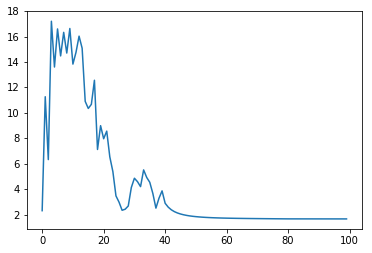

In [108]:
plt.plot(list(range(max_iter)), loss_list)

接下来使用训练好的权重测试一张图片。

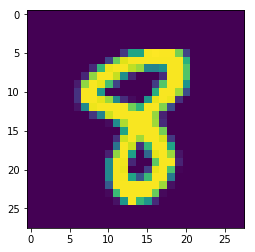

In [110]:
# 从测试机中随机抽取一张图片
import random
test_index = random.randint(0, mnist_test_data.shape[0]-1)
test_img = mnist_test_data[test_index, :]
# 展示图片
plt.imshow(test_img.reshape((28, 28)))

预测:

In [124]:
prob = softmax(np.dot(test_img[np.newaxis, :], W)) # 归一化为概率
np.argmax(prob, axis=1) # 取概率最大的坐标

array([8])

输出应当很大可能是正确的，本次训练的结果很成功！

## 实验总结

本次实验内容比较多，我们了解并学习了迁移学习的相关知识，重点介绍了微调，过拟合、欠拟合的概念以及解决方法等内容。这些概念在实际开发、应用中，基本都会利用到。实际训练时，我们很少重新开始训练，往往会利用已经训练好的预训练模型。

总结本次试验的主要知识点有：

- 迁移学习
- 微调
- 过拟合、欠拟合
- 训练可视化
- 模型可视化
- 数据预处理

**拓展阅读：**

- [Overfitting](https://en.wikipedia.org/wiki/Overfitting)
- [Classification: Instant Recognition with Caffe](http://nbviewer.jupyter.org/github/BVLC/caffe/blob/master/examples/00-classification.ipynb)
- [How to extract features of an image from a trained model](https://discuss.pytorch.org/t/how-to-extract-features-of-an-image-from-a-trained-model/119)
- [Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)

---

<img src="https://img.shields.io/badge/%E5%AE%9E%E9%AA%8C%E6%A5%BC-%E7%89%88%E6%9D%83%E6%89%80%E6%9C%89-lightgrey.svg?logo=&longCache=true&style=flat-square"></img>